# Basit Lineer Regresyon

In [2]:
import pandas as pd
ad=pd.read_csv("Advertising.csv",usecols=[1,2,3,4]) #indexleri değişken gibi gördü bunu düzeltmek için yaptık:)
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T
#std cok büyük ama biz dağilima bakıyoruz bu tek başına sorunn olduuğunu göztermez
#daha yayvan bir dağılılm olduğunu düşünebiliriz
#median ve maen arasında ciddi fark varsa o zaman sıkıntı vardır diyebiliriz

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.median()

TV           149.75
radio         22.90
newspaper     25.75
sales         12.90
dtype: float64

In [6]:
#eksisk gözelem kontrolu
df.isnull().values.any()

False

In [7]:
#korelasyona yani değişkenler arsındaki ilişkiye baklım
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


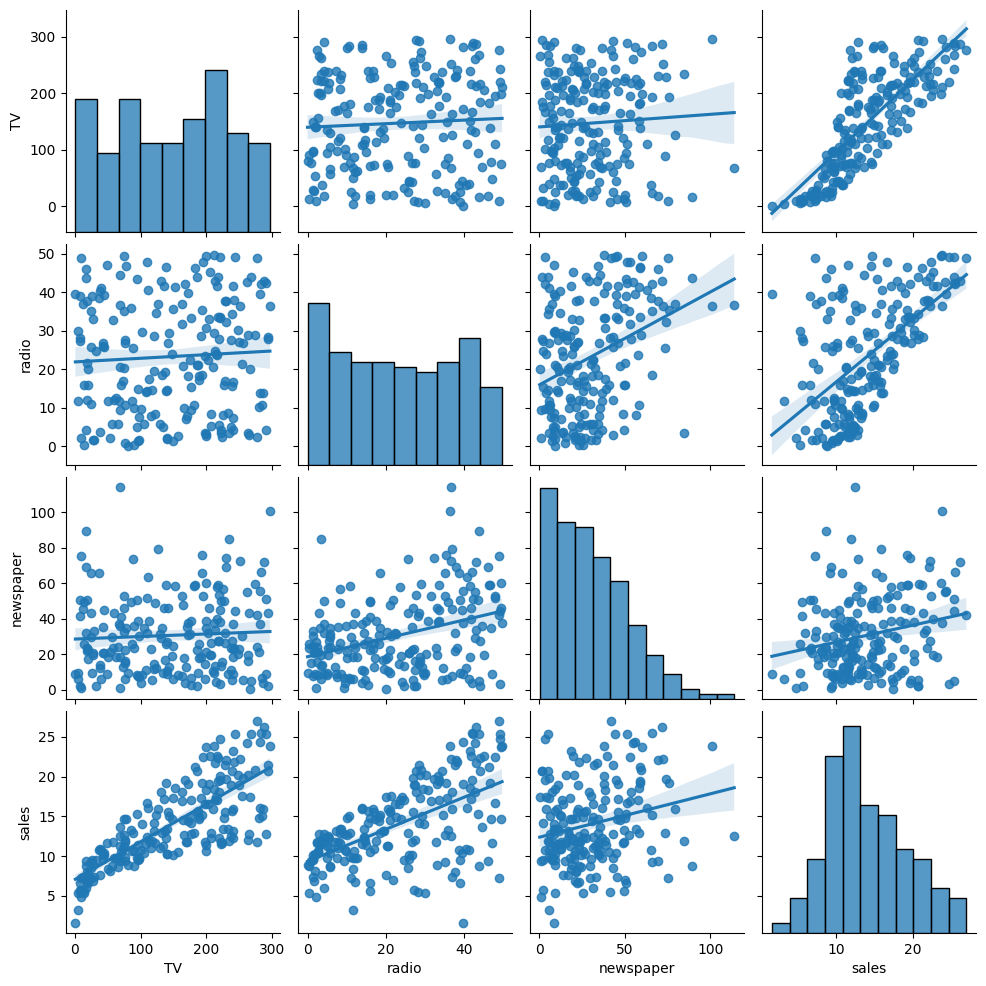

In [8]:
import seaborn as sns
# verielr arasındaki ilşkileri göstrir
sns.pairplot(df,kind="reg");
# mesala tv ve sales arasındaki ilişkiye bakalım. eğimi bir alan doğru. doğrusal pozitif yönlü kuvvetli ilişki
# eğimin bir olması tam ideal durum
# news paper salaes ilşkisine bakarsak eğim daha hafif
# eğim burada şiddeti ifasde eder eğimin 0 a yaklaşması ilşkinin zayıfladığını gösterir. 
# aşşağıya dönmeside negatif yönlü olduğunu gösterir

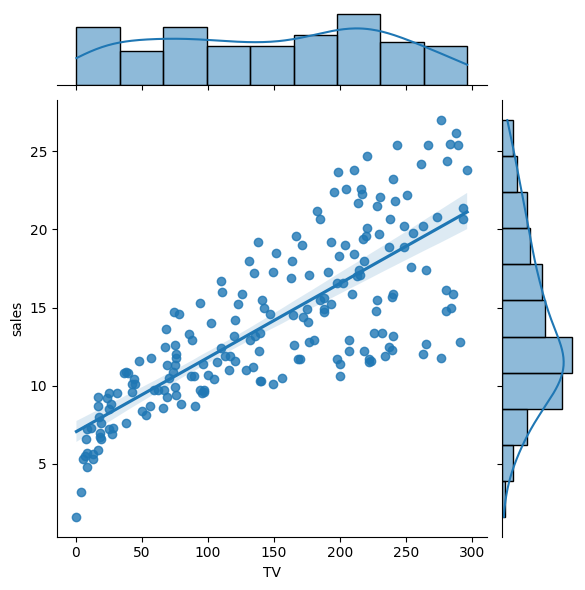

In [17]:
#tv ve sales arasındaki ilişkiye odaklanalım
#bildiğin üzere joinplot histogram ve saçılım grafiğinin birleşmiş halidir ikili iliki üzerinde duru
sns.jointplot(x="TV", y="sales", data=df, kind="reg")
#? görüldüğü üzere tv ikili dağılım yapısına sahip iki tepecikli
#? satış ise gayet düzgün bir dağılaam sahip

In [10]:
#mesala tv ile radio arasında ciddi bşr ilişki yok 
# o zaman sales için radio ve tv ye göre ayrı ayrı bakabiliriz
# yapmaya çalıştığımız şey şu. sales değişkenini inceleyeceğiz. ancak iki tane arasında koralasyon(ilişki) olan değişkene göre inceleresek zaten
# bu değişkenlerin hali hazırda arasında koralasyon olduğu için bundan etkilenip saalesı isteğimiz gibi net olarak göremeyiz
# bizde tv ve readio gibi aralarında 0.05 gibi düşük koralasyon olan değişkenlerle ayrı ayrı inceleriz.

# HADİ BAŞLAYALIM :))

### Statsmodels ile modelleme

In [11]:
import statsmodels.api as sm

In [12]:
#bağımsiz değişkenimiz seçiyoruz
x=df[["TV"]]
print(type(x))
x[0:5]


<class 'pandas.core.frame.DataFrame'>


,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
#teknik bir işlme sadece x bağımsiz değişkeninden oluşan matrise sabit 1 ekliyoruz
x=sm.add_constant(x)

In [14]:
x[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [15]:
#bapımlı değişkenimizi seçiyoruz
y=df["sales"]
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [17]:
# lineer modemizi kuruyoruz
#aslında initialize ettik
lm=sm.OLS(y,x)


In [18]:
#modeli fit edelim
model=lm.fit()

In [21]:
#bir özetle modelimiez bakalım
model.summary()

# mesela burad R_squaredd değeri var bu bağımsiz değişkenin bağımlı değişken üzerindeki değişimin ne kadarının açıklayabildiğini belirtir
# yani sales değişkenin üzerindeki yaklaşık %60 lık değişim tv ile açıklanabiliyor
# adj.R-squared ise düzeltilmiş R değeridir. R-squared anlamlı anlamsız değişken olması durumda r square artr iste bu anlamsız
# artiıilardan kurtulmak daha doğru değere ulaşmak için düzeltilmiş r kare kullanılır. 

#F statistic modelin anlamlığını belirtir
# prı-op()F_statisticise p value değeridir

#katsayı kısmı -->en önemli kısım
# basit doğrusal regresyonun formuşünde B0+B1.Xi+ei demiştik
# işte B0 [const,coef] kısmı. B1 [TV,coef] kısmı
# hemen satırların devamına baktığımızda standard hatsı var. biraz daha ilerlediğimizde bu katsayının anlamlı olup olmadığını belirten 
# t istatistiği ve p value değerleri var.  
# biraz dahah devam ettiğimizde ise güüzen aralıklarını görürüz.
# direkt buradaki bilgilerden hareket edersek bize diyor ki. bu katsayıla anlamlısır 
# ve %95 doğruluk ile b0=[6.130 ,7.935] aralığında b1=[0.042, 0.053] aralığında yer alır.

# katsayıları yorumlayalım b0=[const,coef] eğrinin y eksenini kestiği nokta. yani diğer değişkenlerde bir değişiklik olmmadığında beklene ort satış budur
# tv nin yani b1 in yorumunu yaparsakta : eğer tv de bir birimlik artış olursa satışlarda da 0.0475 lik artış beklenir. hocam böyle
# edebi ayzıyorumda zatenn formulllerden bunları çıkartabiliyorsun. b0+b1.Xi+ei
#  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        18:17:03   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df)
model=lm.fit()
model.summary()
# aynı şekli elde ettik sadece fonksiyonn çağirma şeklimiz farlı
# dikkatini çekmiş ayrı ayrı x'i matrise
# y yi seriye çeirme işlemlerini aylamış oolduk

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        18:17:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#katsayıları göreyim de artık tahmini yapayım dersen

In [24]:
#modelin parametrelerine ulaşmak için temizden model.params deriz:))
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [30]:
#katsayı kısmını almak için
#şimdi yukarıdaki tabloya bakalım Dep. ->Variable:  ->Covariance Type:  ->Omnibus: tablonun üç kısmı şimdi biz katsayılaryani [1]. indise ulaşmak istiyoruz
model.summary().tables[1]

#yani özet diyip çalıştırıp tüm bilgilere ulaşmaktansa sadece tablonun 1.indisine yani katsayılar bilgisine ulaştık

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [31]:
#katsayıların güven aralıklarını öğrenmek için: adı üstünde conf_int()diyoruz
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [32]:
#modelin anlamlılığını öğrenmek için artık dilimizde tüy bitti p value değerine bakarız.
# bakalım
print("p_value %.4f"%model.f_pvalue)

#f istatistiğiin p-value sine bakıypruz

p_value 0.0000


In [37]:
#direkt f istatistiğine baakmak istersek
print("f value %.4f"%model.fvalue)

f value 312.1450


In [36]:
#parametre anlamlılığı
model.tvalues[:]

#zaten buraya kadar verdiğimiz değerleri tabloda gördük okuduk ama belirli bir değeri tek başına net olarak görmek istesek
# nasıl çağırırız bunu ogrenmek için birde tek tek çağırdık

Intercept    15.360275
TV           17.667626
dtype: float64

In [41]:
model.rsquared
#aşırı uyumu göz ardı edemez. doğru sonuç vermesine rağmen model testten geçeemez
# bu yüzden düzeltilmiş r kare değeri kuşşanılır

0.6118750508500712

In [42]:
model.rsquared_adj

0.6099148238341625

In [35]:
#mse nedir: ortalama kare hatası (mean squared error)
# 

model.mse_model

3314.6181668686495